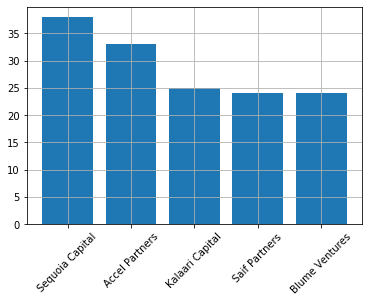

In [2]:
# Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# City Locations where startup can be estabilished 
target_locations = {'Bangalore','Mumbai','Gurgaon','Noida','New Delhi'}

# City Name Extraction 
def city_name(name):
    return name.split('/')[0].strip()

# Filter Cities and make other null
def filter_city(city):
    if city in target_locations:
        return city
    return ''



# Investors name and how many times invested in differnt startups
investors = {}

def startup_investors(startup_investor):
    startup_investor = str(startup_investor)
    startupname = startup_investor.split('###')[0].strip().title()
    investornames = startup_investor.split('###')[1]
    investornames = investornames.split(',')
    for name in investornames:
        name = name.strip().title()
        if name!='':
            if investors.get(name) is None:
                investors[name] = set([startupname])
            else:
                if startupname not in investors[name]:
                    investors[name].add(startupname)
    return startup_investor



# Update Investment Type Name
def updateType(investtype):
    if investtype=='SeedFunding':
        return 'Seed Funding'
    if investtype=='Crowd funding':
        return 'Crowd Funding'
    if investtype=='PrivateEquity':
        return 'Private Equity'
    return investtype

# Update Startup Names
def updateStartupName(name):
    oyonames = ['Oyo Rooms','OYO Rooms','OyoRooms','Oyorooms','Oyo']
    olanames = ['Olacabs','Ola','Ola Cabs']
    flipkartnames = ['Flipkart.com','Flipkart']
    paytmnames = ['Paytm','Paytm Marketplace']
    if name in oyonames:
        return 'Oyo'
    if name in olanames:
        return 'Ola'
    if name in flipkartnames:
        return 'Flipkart'
    if name in paytmnames:
        return 'Paytm'
    return name

# Load Data
df_startups=pd.read_csv('startup_funding.csv',encoding='utf-8') 

# Drop null valued rows 
df_startups = df_startups[pd.notna(df_startups['InvestmentType'])]


# Update with proper investment type
df_startups["InvestmentType"] = df_startups["InvestmentType"].apply(updateType)

# Filter out only Private Equity
df_startups = df_startups[df_startups['InvestmentType']=='Private Equity']


# Droping all rows wherein no startup name and investor name is present
df_startups = df_startups[pd.notna(df_startups['InvestorsName'])]
df_startups = df_startups[pd.notna(df_startups['StartupName'])]


# Drop all rows wherein city name is missing
df_startups['CityLocation'].dropna(inplace = True) 

# Get Location Names
df_startups['CityLocation'] = df_startups['CityLocation'].apply(city_name) # First City Name

# Handle Case Sensitive and Proper Name 
df_startups['CityLocation'].replace('Delhi','New Delhi', inplace = True) 
df_startups['CityLocation'].replace('bangalore','Bangalore',inplace = True)


# Only cities where friend wants to estabilish startup.
df_startups['CityLocation'] = df_startups['CityLocation'].apply(filter_city)
index = df_startups[df_startups['CityLocation']==''].index
df_startups.drop(index,inplace=True)


# Update with proper startup name
df_startups['StartupName'] = df_startups['StartupName'].apply(updateStartupName)

# Combine the startup name and investor names 
df_startups['startup_investor'] = df_startups['StartupName'] + '###' + df_startups['InvestorsName']
df_startups['startup_investor'] = df_startups['startup_investor'].apply(startup_investors)


investor_counts = [[len(value),key]for key, value in investors.items()]
investor_counts.sort(reverse=True)

investor = [ i[1] for i in investor_counts[0:5]]
counts = [ i[0] for i in investor_counts[0:5]]

plt.bar(investor,counts)
plt.xticks(rotation=45)
plt.grid()
plt.show()
